## Семинар 2 "Распознавание рукописных цифр"

ФИО: 

В этом задании мы используем нейронную сеть из предыдущего семинара для распознавания рукописных цифр. Также мы исследуем как влияет выбор нелинейности и предобработка данных на качество классификации. 

Чтобы не тратить время на подготовку данных, мы прилагаем готовый код с примером использования для получения обучающей и тестовой выборок. Для запуска скрипта вам понадобится библиотека PyTorch (инструкции по установке можно найти на сайте <a href="http://pytorch.org">pytorch.org</a>)

In [44]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
%matplotlib inline

In [45]:
to_numpy = lambda x: x.numpy()
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [46]:
## Usage example:
t= 0
train_list = []
train_label_list = []
for X, y in train_loader:
    X = X.view(X.size(0), -1)
    t+=1
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    for i in X:
        train_list.append(i)
    for j in y:
        train_label_list.append(j)
    
    pass

In [47]:
X_train = np.array(train_list)
y_train = np.array(train_label_list)

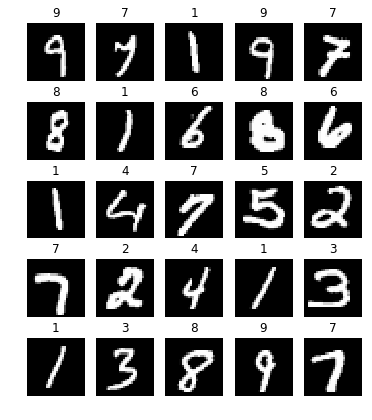

In [48]:
plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

### Часть 1: MNIST
Обучите полносвязную нейронную сеть с архитектурой 784-100-100-10 и сигмоидой в качестве нелинейности. Какую точность классификации удалось получить? Нарисуйте график сходимости на обучающей и тестовой выборках. В качестве темпа обучения (learning rate) возьмите 0.01

Линейная функция.

In [49]:
class Linear:
    def __init__(self, input_size, output_size):
        '''
        Creates weights and biases for linear layer.
        Dimention of inputs is *input_size*, of output: *output_size*.
        '''
        #### YOUR CODE HERE
        #### Create weights, initialize them with samples from N(0, 0.1).
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.normal(0, 0.1, (input_size + 1, output_size))
        self.dLdw = 0
        self.X = 0
        
        return
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size d
        '''
        #### YOUR CODE HERE
        #### Apply layer to input
        self.X = X
        
        return np.dot(np.hstack((X, np.ones((X.shape[0], 1)))), self.weights)
    
    def backward(self, dLdy):
        '''
        1. Compute dLdw and dLdx.
        2. Store dLdw for step() call
        3. Return dLdx
        '''
        #### YOUR CODE HERE
        dLdx = np.dot(dLdy, self.weights[:len(self.weights) - 1].T)  
        self.dLdw = np.dot(np.vstack((self.X.T, np.ones(self.X.shape[0]))), dLdy)
        
        return dLdx
    
    def step(self, learning_rate):
        '''
        1. Apply gradient dLdw to network:
        w <- w - l*dLdw
        '''
        #### YOUR CODE HERE
        self.weights = self.weights + self.dLdw * learning_rate

Класс нелинейных функций.

In [50]:
class Sigmoid:
    def __init__(self):
        self.X = np.array([])
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size d
        '''
        #### YOUR CODE HERE
        #### Apply layer to input
        
        self.X = X
        
        return 1.0 / (1.0 + np.exp(-1 * X))
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        #### YOUR CODE HERE
        
        m = np.exp(self.X)
        #print(dLdy.shape, self.X.shape)
    
        return dLdy * (m / (m + 1.0)**2)
    
    def step(self, learning_rate):
        pass
    

    
    
    
class RELU:
    def __init__(self):
        self.X = np.array([])
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size d
        '''
        #### YOUR CODE HERE
        #### Apply layer to input
        self.X = X
        m = np.array([[max(X[i][j], 0) for j in range(len(X[0]))] for i in range(len(self.X))])
        
        return m
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        #### YOUR CODE HERE
        
        #print(dLdy.shape, self.X.shape)
        
        
        return dLdy * (self.X > 0)
    
    def step(self, learning_rate):
        pass
  





class ELU:
    def __init__(self):
        self.X = np.array([])
        pass
    
    def forward(self, X):
        self.X = X
        return  X * (X > 0) + 0.5 * (np.exp(X * (self.X <= 0)) - 1) * (self.X <= 0)


    
    
    def backward(self, dLdy):
        return dLdy * (1.0 * (self.X > 0) + (0.5 * (np.exp(self.X * (self.X <= 0)) - 1) + 0.5) * (self.X <= 0))
    
    
    def step(self, learning_rate):
        pass
    
    
    
    

Soft-max функция

In [51]:
class NLLLoss:
    def __init__(self):
        '''
        Applies Softmax operation to inputs and computes NLL loss
        '''
        #### YOUR CODE HERE
        #### (Hint: No code is expected here, just joking)
        self.X = np.array([])
        self.y = np.array([])
        pass
    
    def forward(self, X, y):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        y is np.array of size (N), contains correct labels
        '''
        #### YOUR CODE HERE
        #### Apply layer to input
    
    
    
    
    
        self.X = X
        self.y = y
   
        def ch(T):
            q = T.max() + np.exp(T - T.max())
            return q.sum()
        
        t_1 = np.array(list(map(ch, X)))
        t_2 = []
        for i in range(len(X)):
            t_2.append(X[i][self.y[i]] - X[i].max())
            
        
        
        return ((np.array(t_2) - np.log(t_1))/len(X)).sum()
    
    

    def backward(self):
        '''
        Note that here 
        dLdy = 1 since L = y
        1. Compute dLdx
        2. Return dLdx
        '''
        #### YOUR CODE HERE
        res = np.exp(self.X)
        r = np.array([res[i].sum() for i in range(len(self.X))])
        
        for i in range(len(self.X)):
            res[i] /= -r[i]
        for i in range(len(self.X)):
            
            res[i][self.y[i]] += 1.0
        
        
        return res*(1/len(X))

In [52]:
def ch(T):
    return np.exp(T - T.max()).sum()
a = np.array([[1,2], [3,4], [6,8]])
print (a)
b = np.array(list(map(ch, a)))
b

[[1 2]
 [3 4]
 [6 8]]


array([ 1.36787944,  1.36787944,  1.13533528])

In [53]:
nll = NLLLoss()
a = np.array([[1,1],[2,3],])
b = np.array([1,1])
nll.forward(a,b)

-1.6917121487243629

In [54]:
nll = NLLLoss()
a = np.array([[1,1],[2,3]])
b = np.array([1,1])
nll.forward(a,b)

-1.6917121487243629

Нейронная сеть

In [63]:
class NeuralNetwork:
    def __init__(self, modules):
        '''
        Constructs network with *modules* as its layers
        '''
        #### YOUR CODE HERE
        self.modules = modules
        pass
    
    def forward(self, X):
        #### YOUR CODE HERE
        #### Apply layers to input
        res = X
        for module in self.modules:
            res = module.forward(res)
        return res
    
    def backward(self, dLdy):
        '''
        dLdy here is a gradient from loss function
        '''
        #### YOUR CODE HERE
        d = dLdy
        for module in self.modules[::-1]:
            d = module.backward(d)
    
    def step(self, learning_rate):
        for module in self.modules:
            module.step(learning_rate)

In [64]:
m = [Linear(784, 100), Sigmoid(), Linear(100, 100), Sigmoid(), Linear(100, 10)]
m = [Linear(784, 100), RELU(), Linear(100, 100), RELU(), Linear(100, 10)]
m = [Linear(784, 100), ELU(), Linear(100, 100), ELU(), Linear(100, 10)]

nll = NLLLoss()
nn = NeuralNetwork(m)

Обучим для начала с сигмоидой.


In [235]:
m = [Linear(784, 100), Sigmoid(), Linear(100, 100), Sigmoid(), Linear(100, 10)]
nll = NLLLoss()
nn = NeuralNetwork(m)

In [236]:
import math
from math import exp, log
tl = 0
flag = []
itera = 30
for j in range(itera):
    if (j%2 == 0):
        print (j)
    tl = 0
    ind = 0
    res = nn.forward(X_train)
    loss = nll.forward(res, y_train)
    nn.backward(nll.backward())
    nn.step(0.0001)
    flag.append(loss)
    print (loss)

0
-2.85919170275
-2.41981067794
2
-2.32676390653
-2.32774630704
4
-2.32003272094
-2.31553327074
6
-2.31197366069
-2.30958762271
8
-2.3082564589
-2.30789744638
10
-2.3084437446
-2.30982393068
12
-2.311998096
-2.3149289711
14
-2.31859837078
-2.32299254606
16
-2.32810983995
-2.33393371589
18
-2.34046260182
-2.34770094179
20
-2.35565890563
-2.36433130109
22
-2.37372181444
-2.38382686186
24
-2.39464774533
-2.4061695239
26
-2.41838215188
-2.4312647866
28
-2.4447993781
-2.4589651047


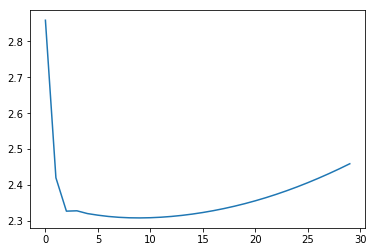

In [237]:
plt.plot(range(itera), -1*np.array(flag))


In [238]:
#Проверим качество на тестовой выборке
t= 0
test_list = []
test_label_list = []
for X, y in test_loader:
    X = X.view(X.size(0), -1)
    t+=1
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    for i in X:
        test_list.append(i)
    for j in y:
        test_label_list.append(j)
    
    pass

In [239]:
X_test = np.array(test_list)
y_test = np.array(test_label_list)

In [240]:
labels = []
res = nn.forward(X_test)
res = np.exp(res) / np.exp(res).sum()
labels.append([res[i].argmax() for i in range(len(y_test))])
from sklearn.metrics import accuracy_score
SIGM_acc_noaug = accuracy_score(np.array(labels).reshape(-1), y_test)
print (SIGM_acc_noaug)

0.6051


### Часть 2: Нелинейности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

In [74]:
#RELU
m = [Linear(784, 100), RELU(), Linear(100, 100), RELU(), Linear(100, 10)]
nll = NLLLoss()
nn = NeuralNetwork(m)

import math
from math import exp, log
tl = 0
flag = []
itera = 30
for j in range(itera):
    if (j%5 == 0):
        print (j)
    tl = 0
    ind = 0
    res = nn.forward(X_train)
    loss = nll.forward(res, y_train)
    nn.backward(nll.backward())
    nn.step(0.00005)
    flag.append(loss)
    print (loss)

0
-4.72248950751
-4.71951497452
-3.92538789071
-3.21583260136
-3.23810347617
5
-3.3873697741
-3.48134421493
-3.60220164497
-3.68506809107
-3.79489220012
10
-3.87000535043
-4.11662418399
-4.40230416754
-4.45277113713
-4.21132403221
15
-4.01510231713
-3.95724924075
-3.9868316482
-4.01941592026
-4.0594840962
20
-4.10647145659
-4.15970454265
-4.25968883865
-4.42704364658
-4.36537035408
25
-4.27107853268
-4.20315352757
-4.15073964556
-4.16796796378
-4.17289967248


0.8826


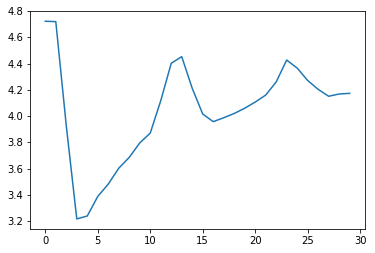

In [75]:
plt.plot(range(itera), -1*np.array(flag))
from sklearn.metrics import accuracy_score
labels = []
res = nn.forward(X_test)
res = np.exp(res) / np.exp(res).sum()
labels.append([res[i].argmax() for i in range(len(y_test))])
RELU_acc_noaug = accuracy_score(np.array(labels).reshape(-1), y_test)
print (RELU_acc_noaug)

ELU

In [76]:
#ELU
m = [Linear(784, 100), ELU(), Linear(100, 100), ELU(), Linear(100, 10)]
nll = NLLLoss()
nn = NeuralNetwork(m)

import math
from math import exp, log
tl = 0
flag = []
itera = 30
for j in range(itera):
    if (j%2 == 0):
        print (j)
    tl = 0
    ind = 0
    res = nn.forward(X_train)
    loss = nll.forward(res, y_train)
    nn.backward(nll.backward())
    nn.step(0.00005)
    flag.append(loss)
    print (loss)

0
-5.19123367306
-5.14036517418
2
-4.41204772438
-3.44262111734
4
-3.40824086559
-3.49219853005
6
-3.59347024996
-3.68242653325
8
-3.75988822041
-3.82481104387
10
-3.8805214095
-3.92767762769
12
-3.96912527738
-4.00478938867
14
-4.03679676131
-4.06461242341
16
-4.09027981725
-4.1125420384
18
-4.13362225089
-4.15156122986
20
-4.16942353009
-4.18394215811
22
-4.19977161866
-4.21170078634
24
-4.22710141428
-4.23752574259
26
-4.25652778368
-4.26938457984
28
-4.30552115288
-4.33473499215


0.8325


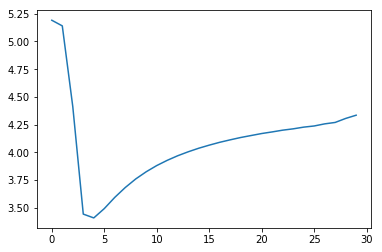

In [77]:
plt.plot(range(itera), -1*np.array(flag))
labels = []
res = nn.forward(X_test)
res = np.exp(res) / np.exp(res).sum()
labels.append([res[i].argmax() for i in range(len(y_test))])
from sklearn.metrics import accuracy_score
ELU_acc_noaug = accuracy_score(np.array(labels).reshape(-1), y_test)
print (ELU_acc_noaug)

### Часть 3: Предобработка данных

Посчитайте на всей обучающей выборке матрицу ковариации и среднее. Нормализуйте данные по схеме: вычесть среднее, декоррелировать, нормировать дисперсию. Сравните графики обучения на одной и той же архитектуре с и без предобработки.

In [220]:
from numpy import linalg
import scipy
from numpy.linalg import inv
from scipy.linalg import sqrtm
itera = 30

In [221]:
def mat(X):
    Cov = (1/len(X)) * (X.T).dot(X)
    I = scipy.eye(len(X.T),len(X.T))
    #Cov_inv = inv(Cov+I)
    #Cov_sqrt = sqrtm(Cov_inv)
    #Cov_sqrt = sqrtm(Cov + I)
    A = np.linalg.svd(Cov)
    a_1 = A[1]**(-1/2)
    print (len(a_1))
    
    return (A[0].dot(a_1*I)).dot(A[2])

def mat2(X):
    X_1 = X - X.mean()
    X_2 = mat(X_1[:10000]).dot(X_1.T)
    X_3 = X_2/X_2.std()
    return X_3.T

In [222]:
X_train_final = mat2(X_train)
X_test_final = mat2(X_test)

784
784


In [223]:
X_train_final.shape
X_test_final.shape

(10000, 784)

In [224]:
A = np.linalg.svd(X_test[:3])
A[1]**(1/2)
a = np.array([4,4,4])
a**(-1/2)
X_train_final.shape
v = 2*scipy.eye(3,3)
v*a

array([[ 8.,  0.,  0.],
       [ 0.,  8.,  0.],
       [ 0.,  0.,  8.]])

In [225]:
#Поехали, сигмоида

m = [Linear(784, 100), Sigmoid(), Linear(100, 100), Sigmoid(), Linear(100, 10)]
nll = NLLLoss()
nn = NeuralNetwork(m)

import math
from math import exp, log
tl = 0
flag = []
for j in range(itera):
    if (j%5 == 0):
        print (j)
    tl = 0
    ind = 0
    res = nn.forward(X_train_final)
    loss = nll.forward(res, y_train)
    nn.backward(nll.backward())
    nn.step(0.001)
    flag.append(loss)
    print (loss)

0


/home/temkahap/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:28: RuntimeWarning: overflow encountered in square


-3.35466061567
-9.64690201072
-5.69595958544
-3.0720181392
-2.72744920055
5
-2.58043695036
-2.49655935916
-2.44869233007
-2.42239304132
-2.40869360558
10
-2.40196021227
-2.39885488232
-2.39753257853
-2.39703899614
-2.39690503457
15
-2.39690899218
-2.39695589869
-2.39700654223
-2.39704812575
-2.39707836122
20
-2.39709865233
-2.39711092339
-2.39711620693
-2.39711966945
-2.39712300262
25
-2.39712479849
-2.39712552524
-2.39712558681
-2.39712525028
-2.39712468484


0.1153


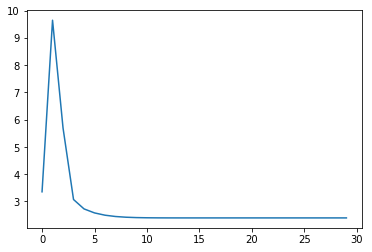

In [226]:
plt.plot(range(itera), -1*np.array(flag))
labels = []
res = nn.forward(X_test_final)
res = np.exp(res) / np.exp(res).sum()
labels.append([res[i].argmax() for i in range(len(y_test))])
from sklearn.metrics import accuracy_score
SIGM_acc_aug = accuracy_score(np.array(labels).reshape(-1), y_test)
print (SIGM_acc_aug)


In [227]:
print(SIGM_acc_noaug, "-точность классфикатора без аугментации данных")
print(SIGM_acc_aug, "-точность классфикатора с аугментации данных")

0.4951 -точность классфикатора без аугментации данных
0.1153 -точность классфикатора с аугментации данных


In [210]:
#Поехали, RELU
m = [Linear(784, 100), RELU(), Linear(100, 100), RELU(), Linear(100, 10)]
nll = NLLLoss()
nn = NeuralNetwork(m)

import math
from math import exp, log
tl = 0
flag = []
for j in range(itera):
    if (j%5 == 0):
        print (j)
    tl = 0
    ind = 0
    res = nn.forward(X_train_final)
    loss = nll.forward(res, y_train)
    nn.backward(nll.backward())
    nn.step(0.00005)
    flag.append(loss)
    print (loss)

0
-4.77166051263
-6.08040424098
-5.55073456585
-3.8550537169
-3.25231482436
5
-2.94761020078
-2.77349916051
-2.93150243666
-3.01593452602
-3.52517276076
10
-4.91750237935
-4.89833972972
-3.49758601704
-2.80608529742
-3.20131292456
15
-3.06121861956
-4.17604228965
-5.31513409701
-4.37796887717
-3.56690882751
20
-2.5152673559
-2.6277092838
-2.9541486084
-2.98510890357
-3.30689362073
25
-3.47784013033
-4.87108824043
-3.57610773989
-3.22468952309
-3.19847781691


0.3567


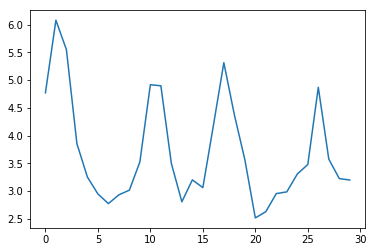

In [211]:
plt.plot(range(itera), -1*np.array(flag))
labels = []
res = nn.forward(X_test_final)
res = np.exp(res) / np.exp(res).sum()
labels.append([res[i].argmax() for i in range(len(y_test))])
from sklearn.metrics import accuracy_score
RELU_acc_aug = accuracy_score(np.array(labels).reshape(-1), y_test)
print (RELU_acc_aug)

In [212]:
print(RELU_acc_noaug,  "-точность классфикатора без аугментации данных")
print(RELU_acc_aug,  "-точность классфикатора с аугментации данных")

0.8826 -точность классфикатора без аугментации данных
0.3567 -точность классфикатора с аугментации данных


In [203]:
#Поехали, ELU
m = [Linear(784, 100), ELU(), Linear(100, 100), ELU(), Linear(100, 10)]
nll = NLLLoss()
nn = NeuralNetwork(m)

import math
from math import exp, log
tl = 0
flag = []
for j in range(itera):
    if (j%5 == 0):
        print (j)
    tl = 0
    ind = 0
    res = nn.forward(X_train_final)
    loss = nll.forward(res, y_train)
    nn.backward(nll.backward())
    nn.step(0.00005)
    flag.append(loss)
    print (loss)

0
-4.56217758542
-5.90885685904
-7.27179977729
-5.28440961208
-4.04094691779
5
-3.93082387234
-3.49799556743
-4.39766730372
-4.24385345524
-4.31278641867
10
-3.61414015804
-3.8996933509
-3.25011172201
-3.22239094225
-3.40274534802
15
-3.48420153348
-3.42033100223
-3.59775911109
-3.56561175409
-3.69379676826
20
-4.52347808453
-4.18868593151
-4.04230447905
-4.36704525508
-5.09621899233
25
-6.06502654535
-5.14890021502
-4.73972111631
-5.01332595605
-3.41907484763


0.5193


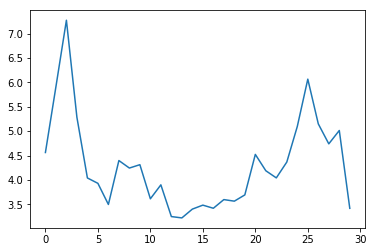

In [204]:
plt.plot(range(itera), -1*np.array(flag))
labels = []
res = nn.forward(X_test_final)
res = np.exp(res) / np.exp(res).sum()
labels.append([res[i].argmax() for i in range(len(y_test))])
from sklearn.metrics import accuracy_score
ELU_acc_aug = accuracy_score(np.array(labels).reshape(-1), y_test)
print (ELU_acc_aug)

In [206]:
print(ELU_acc_noaug, "-точность классфикатора без аугментации данных")
print(ELU_acc_aug, "точность классфикатора с аугментации данных")

0.8325 -точность классфикатора без аугментации данных
0.5193 точность классфикатора с аугментации данных


### Часть 4: Выводы
Опишите полученные результаты: как влияют выбор нелинейности и предобработка данных на скорость сходимости и итоговое качество?